## cleaning data for model training 

### problem statement

In [322]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [323]:
data = pd.read_csv('tripadvior.csv')
data.head()

,stt,url,address,name,location,confirmed,rate,votes,rest_type,special_diet,price_max,price_min
0,0,https://www.tripadvisor.com.vn/Restaurant_Revi...,"88 Đồng Khởi, Q.1 Khách Sạn Sheraton, Thành ph...",The Lounge,Thành phố Hồ Chí Minh,Y,5.0,266.0,"Quầy bar, Cà phê, Đồ ăn nhanh",Y,NaN,NaN
1,1,https://www.tripadvisor.com.vn/Restaurant_Revi...,"Sheraton Saigon Hotel & Towers, Level 2 88 Don...",Li Bai Restaurant,Thành phố Hồ Chí Minh,Y,5.0,1070.0,"Kiểu Trung Quốc, Kiểu Á",Y,NaN,NaN
2,2,https://www.tripadvisor.com.vn/Restaurant_Revi...,"80 Đông Du, Phường Bến Nghé, Quận 1 Sheraton S...",Nhà Hàng Saigon Café,Thành phố Hồ Chí Minh,Y,5.0,446.0,"Hải sản, Kiểu Á, Quốc tế",Y,NaN,NaN
3,3,https://www.tripadvisor.com.vn/Restaurant_Revi...,"8-15 Ton Duc Thang Street, District 1 Renaissa...",Kabin,Thành phố Hồ Chí Minh,Y,5.0,295.0,Kiểu Trung Quốc,Y,2325581.0,372093.0
4,4,https://www.tripadvisor.com.vn/Restaurant_Revi...,"112 Pham Viet Chanh, Phuong 19, Binh Thanh, Th...",Kebaby,Thành phố Hồ Chí Minh,Y,5.0,115.0,"Đồ ăn nhanh, Kiểu Địa Trung Hải, Kiểu Thô...",Y,162791.0,46512.0


In [324]:
data.isna().sum()

stt                0
url                0
address            0
name               3
location           0
confirmed          0
rate             111
votes            111
rest_type         55
special_diet       0
price_max       1221
price_min       1221
dtype: int64

In [325]:
del data['url']
del data['stt']
del data['address']
del data['name']

In [326]:
# Median
meanRate = data['rate'].median()
data['rate'] = data['rate'].fillna(meanRate)

# Median
meanVote = data['votes'].median()
data['votes'] = data['votes'].fillna(meanVote)
data.dropna(subset=['rest_type'],inplace=True)
data.drop_duplicates(inplace=True)

data.isna().sum()


location        0
confirmed       0
rate            0
votes           0
rest_type       0
special_diet    0
dtype: int64

In [327]:
data.head()

,location,confirmed,rate,votes,rest_type,special_diet
0,Thành phố Hồ Chí Minh,Y,5.0,266.0,"Quầy bar, Cà phê, Đồ ăn nhanh",Y
1,Thành phố Hồ Chí Minh,Y,5.0,1070.0,"Kiểu Trung Quốc, Kiểu Á",Y
2,Thành phố Hồ Chí Minh,Y,5.0,446.0,"Hải sản, Kiểu Á, Quốc tế",Y
3,Thành phố Hồ Chí Minh,Y,5.0,295.0,Kiểu Trung Quốc,Y
4,Thành phố Hồ Chí Minh,Y,5.0,115.0,"Đồ ăn nhanh, Kiểu Địa Trung Hải, Kiểu Thô...",Y


<AxesSubplot:>

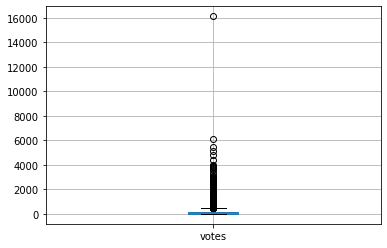

In [328]:

data.boxplot(['votes'])

In [329]:
import scipy.stats as stat
def plot_data(df, feature):
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    df[feature].hist() # histogram
    plt.subplot(1, 2, 2)
    stat.probplot(df[feature], dist='norm', plot=plt)# prob plot
    plt.show()

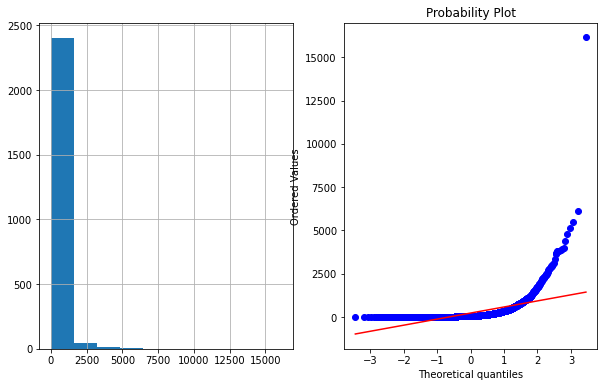

In [330]:
plot_data(data,'votes')

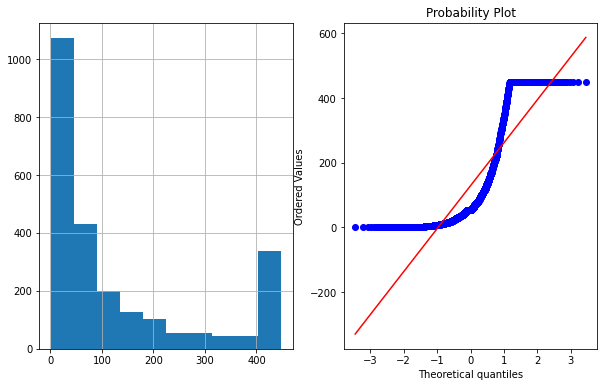

In [331]:
IQR = data["votes"].quantile(0.75) - data["votes"].quantile(0.25)
lower_age = data['votes'].quantile(0.25) - 1.5*IQR
upper_age = data['votes'].quantile(0.75) + 1.5*IQR
data.loc[data['votes'] >= upper_age, 'votes'] = upper_age
plot_data(data,'votes')


<AxesSubplot:>

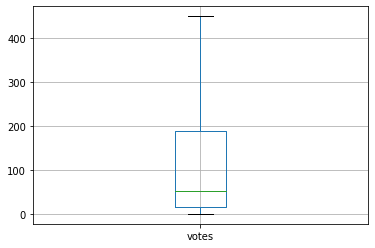

In [332]:
data.boxplot(['votes'])

In [337]:
data.to_csv('cleandata.csv')
data.location.str.split("Tỉnh").map(lambda x: x[-1])


0       Thành phố Hồ Chí Minh
1       Thành phố Hồ Chí Minh
2       Thành phố Hồ Chí Minh
3       Thành phố Hồ Chí Minh
4       Thành phố Hồ Chí Minh
                ...          
2582                 Lâm Đồng
2583                 Lâm Đồng
2584                 Lâm Đồng
2587                 Lâm Đồng
2591                 Lâm Đồng
Name: location, Length: 2464, dtype: object

# Feature Engineering